In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

In [276]:
#Import data from csv file
filename = "mst-results.csv"
df = pd.read_csv(filename,sep=" ")
all_data = df #df.dropna()

#Remove outliers
all_data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["kuskrall_time"] <= 3000)]


#Get subtables
complete_graph_data = all_data[all_data["graph_type"] == "complete_graph"]
cycle_graph_data = all_data[all_data["graph_type"] == "cycle_graph"]
random_graph_data = all_data[all_data["graph_type"] == "ramdom_graph"]

all_data

,graph_type,node_size,weight_distribution,max_weight,max_read,our_runtime,kuskrall_time,groundtruth,approximation,error
0,ramdom_graph,1000,random_weights,1,100,0.003829,0.017036,999.0,999.0,0.000000
1,ramdom_graph,1000,random_weights,1,1000,0.055851,0.011343,999.0,999.0,0.000000
4,ramdom_graph,1000,random_weights,10,100,0.002410,0.010175,3241.0,2996.0,8.177570
5,ramdom_graph,1000,random_weights,10,1000,0.096031,0.009526,3197.0,3155.0,1.331220
8,ramdom_graph,1000,random_weights,100,100,0.014899,0.010416,28072.0,23954.0,17.191283
...,...,...,...,...,...,...,...,...,...,...
633,complete_graph,10000,skew_normal,100,1000,10.867942,447.803420,489950.0,329967.0,48.484545
634,complete_graph,10000,skew_normal,100,10000,10.686621,503.267169,489951.0,369951.0,32.436728
636,complete_graph,10000,skew_normal,1000,100,8.926950,1464.508878,4989499.0,9999.0,49799.979998
637,complete_graph,10000,skew_normal,1000,1000,8.937484,1474.227430,4989498.0,9999.0,49799.969997


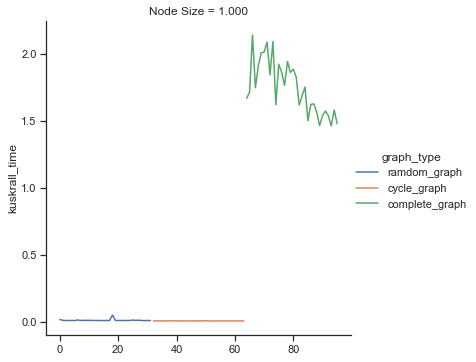

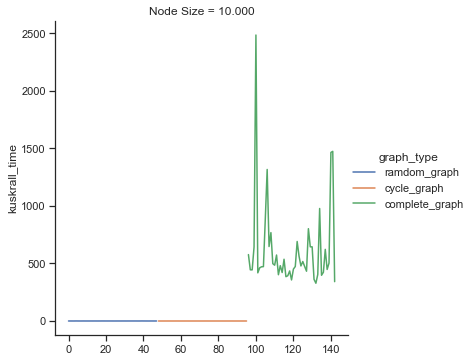

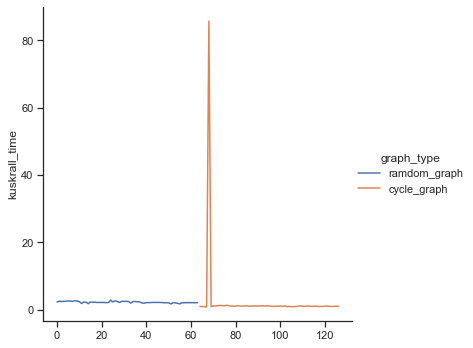

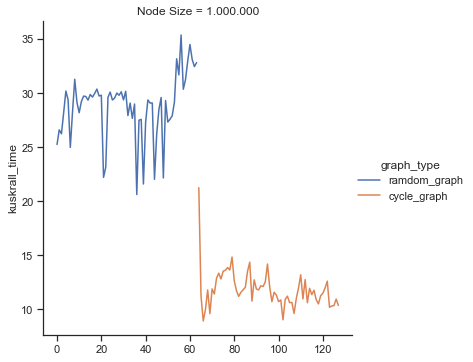

In [277]:
data = all_data[(all_data["node_size"] == 1000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.title("Node Size = 1.000")
plt.savefig("kruskall_node1000_graphtype.png")

data = all_data[(all_data["node_size"] == 10000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.title("Node Size = 10.000")
plt.savefig("kruskall_node10000_graphtype.png")

data = all_data[(all_data["node_size"] == 100000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.savefig("kruskall_node100000_graphtype")

data = all_data[(all_data["node_size"] == 1000000)]
sns.relplot(x=range(len(data)), y="kuskrall_time", hue="graph_type", kind="line", ci="sd", data=data);
plt.title("Node Size = 1.000.000")
plt.savefig("kruskall_node1000000_graphtype")



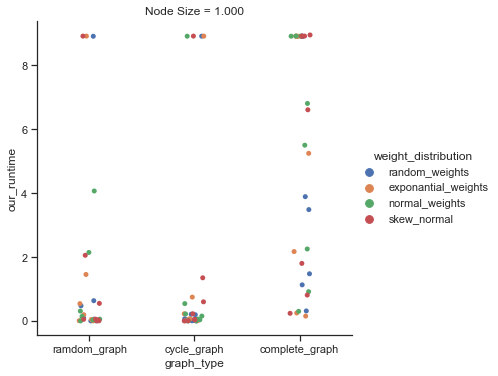

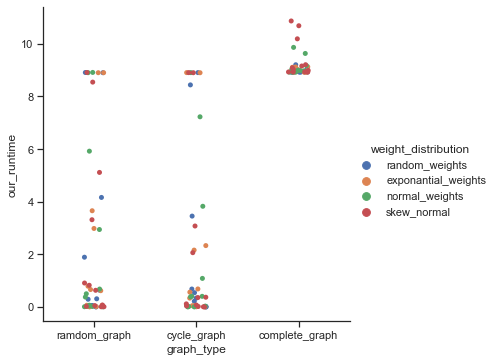

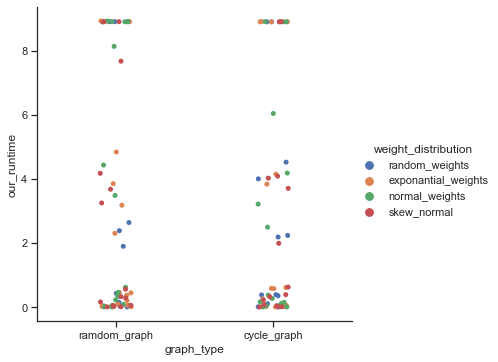

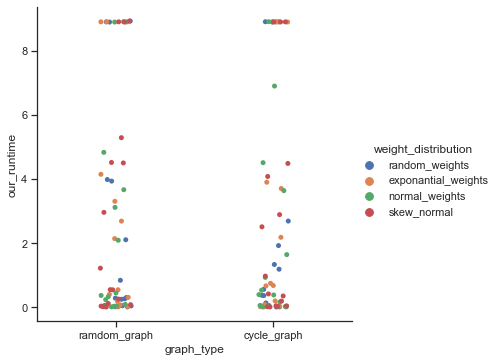

In [278]:
sns.set_theme(style="ticks", color_codes=True)

data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 1000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.title('Node Size = 1.000')
plt.savefig("ourruntime_node1000_wdistro.png")

data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 10000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.savefig("ourruntime_node10000_wdistro.png")


data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 100000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.savefig("ourruntime_node100000_wdistro.png")


data = all_data[(all_data["our_runtime"] <= 3000) & (all_data["node_size"] == 1000000)]
sns.catplot(x="graph_type", y="our_runtime", hue="weight_distribution", data=data)
plt.savefig("ourruntime_node1000000_wdistro.png")


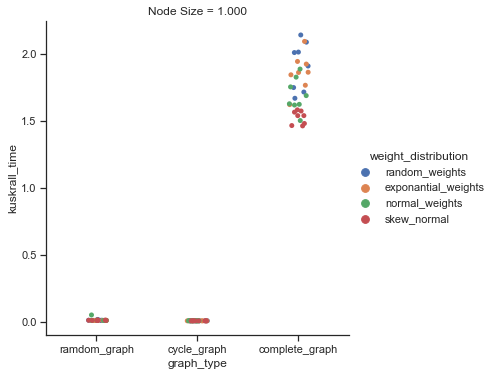

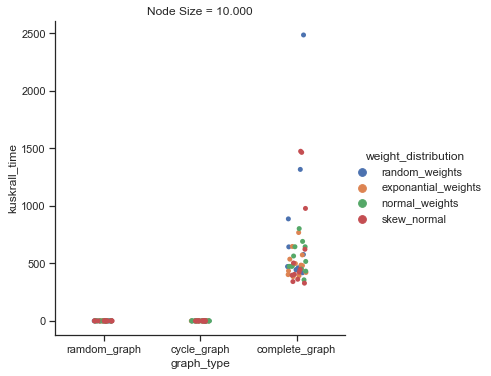

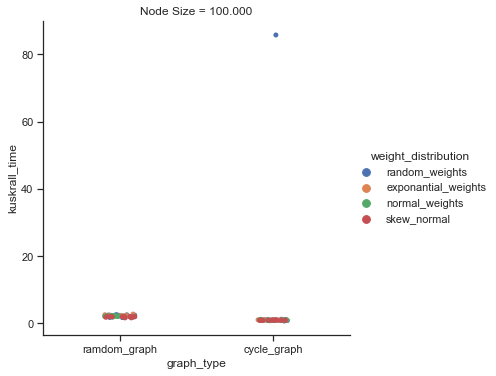

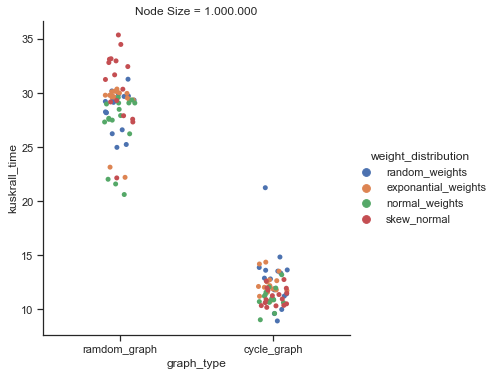

In [279]:
sns.set_theme(style="ticks", color_codes=True)

data = all_data[(all_data["node_size"] == 1000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 1.000')
plt.savefig("kuskrall_node1000_wdistro.png")


data = all_data[(all_data["node_size"] == 10000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 10.000')
plt.savefig("kuskrall_node10000_wdistro.png")


data = all_data[(all_data["node_size"] == 100000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 100.000')
plt.savefig("kuskrall_node100000_wdistro.png")


data = all_data[(all_data["node_size"] == 1000000)]
sns.catplot(x="graph_type", y="kuskrall_time", hue="weight_distribution", data=data)
plt.title('Node Size = 1.000.000')
plt.savefig("kuskrall_node1000000_wdistro.png")


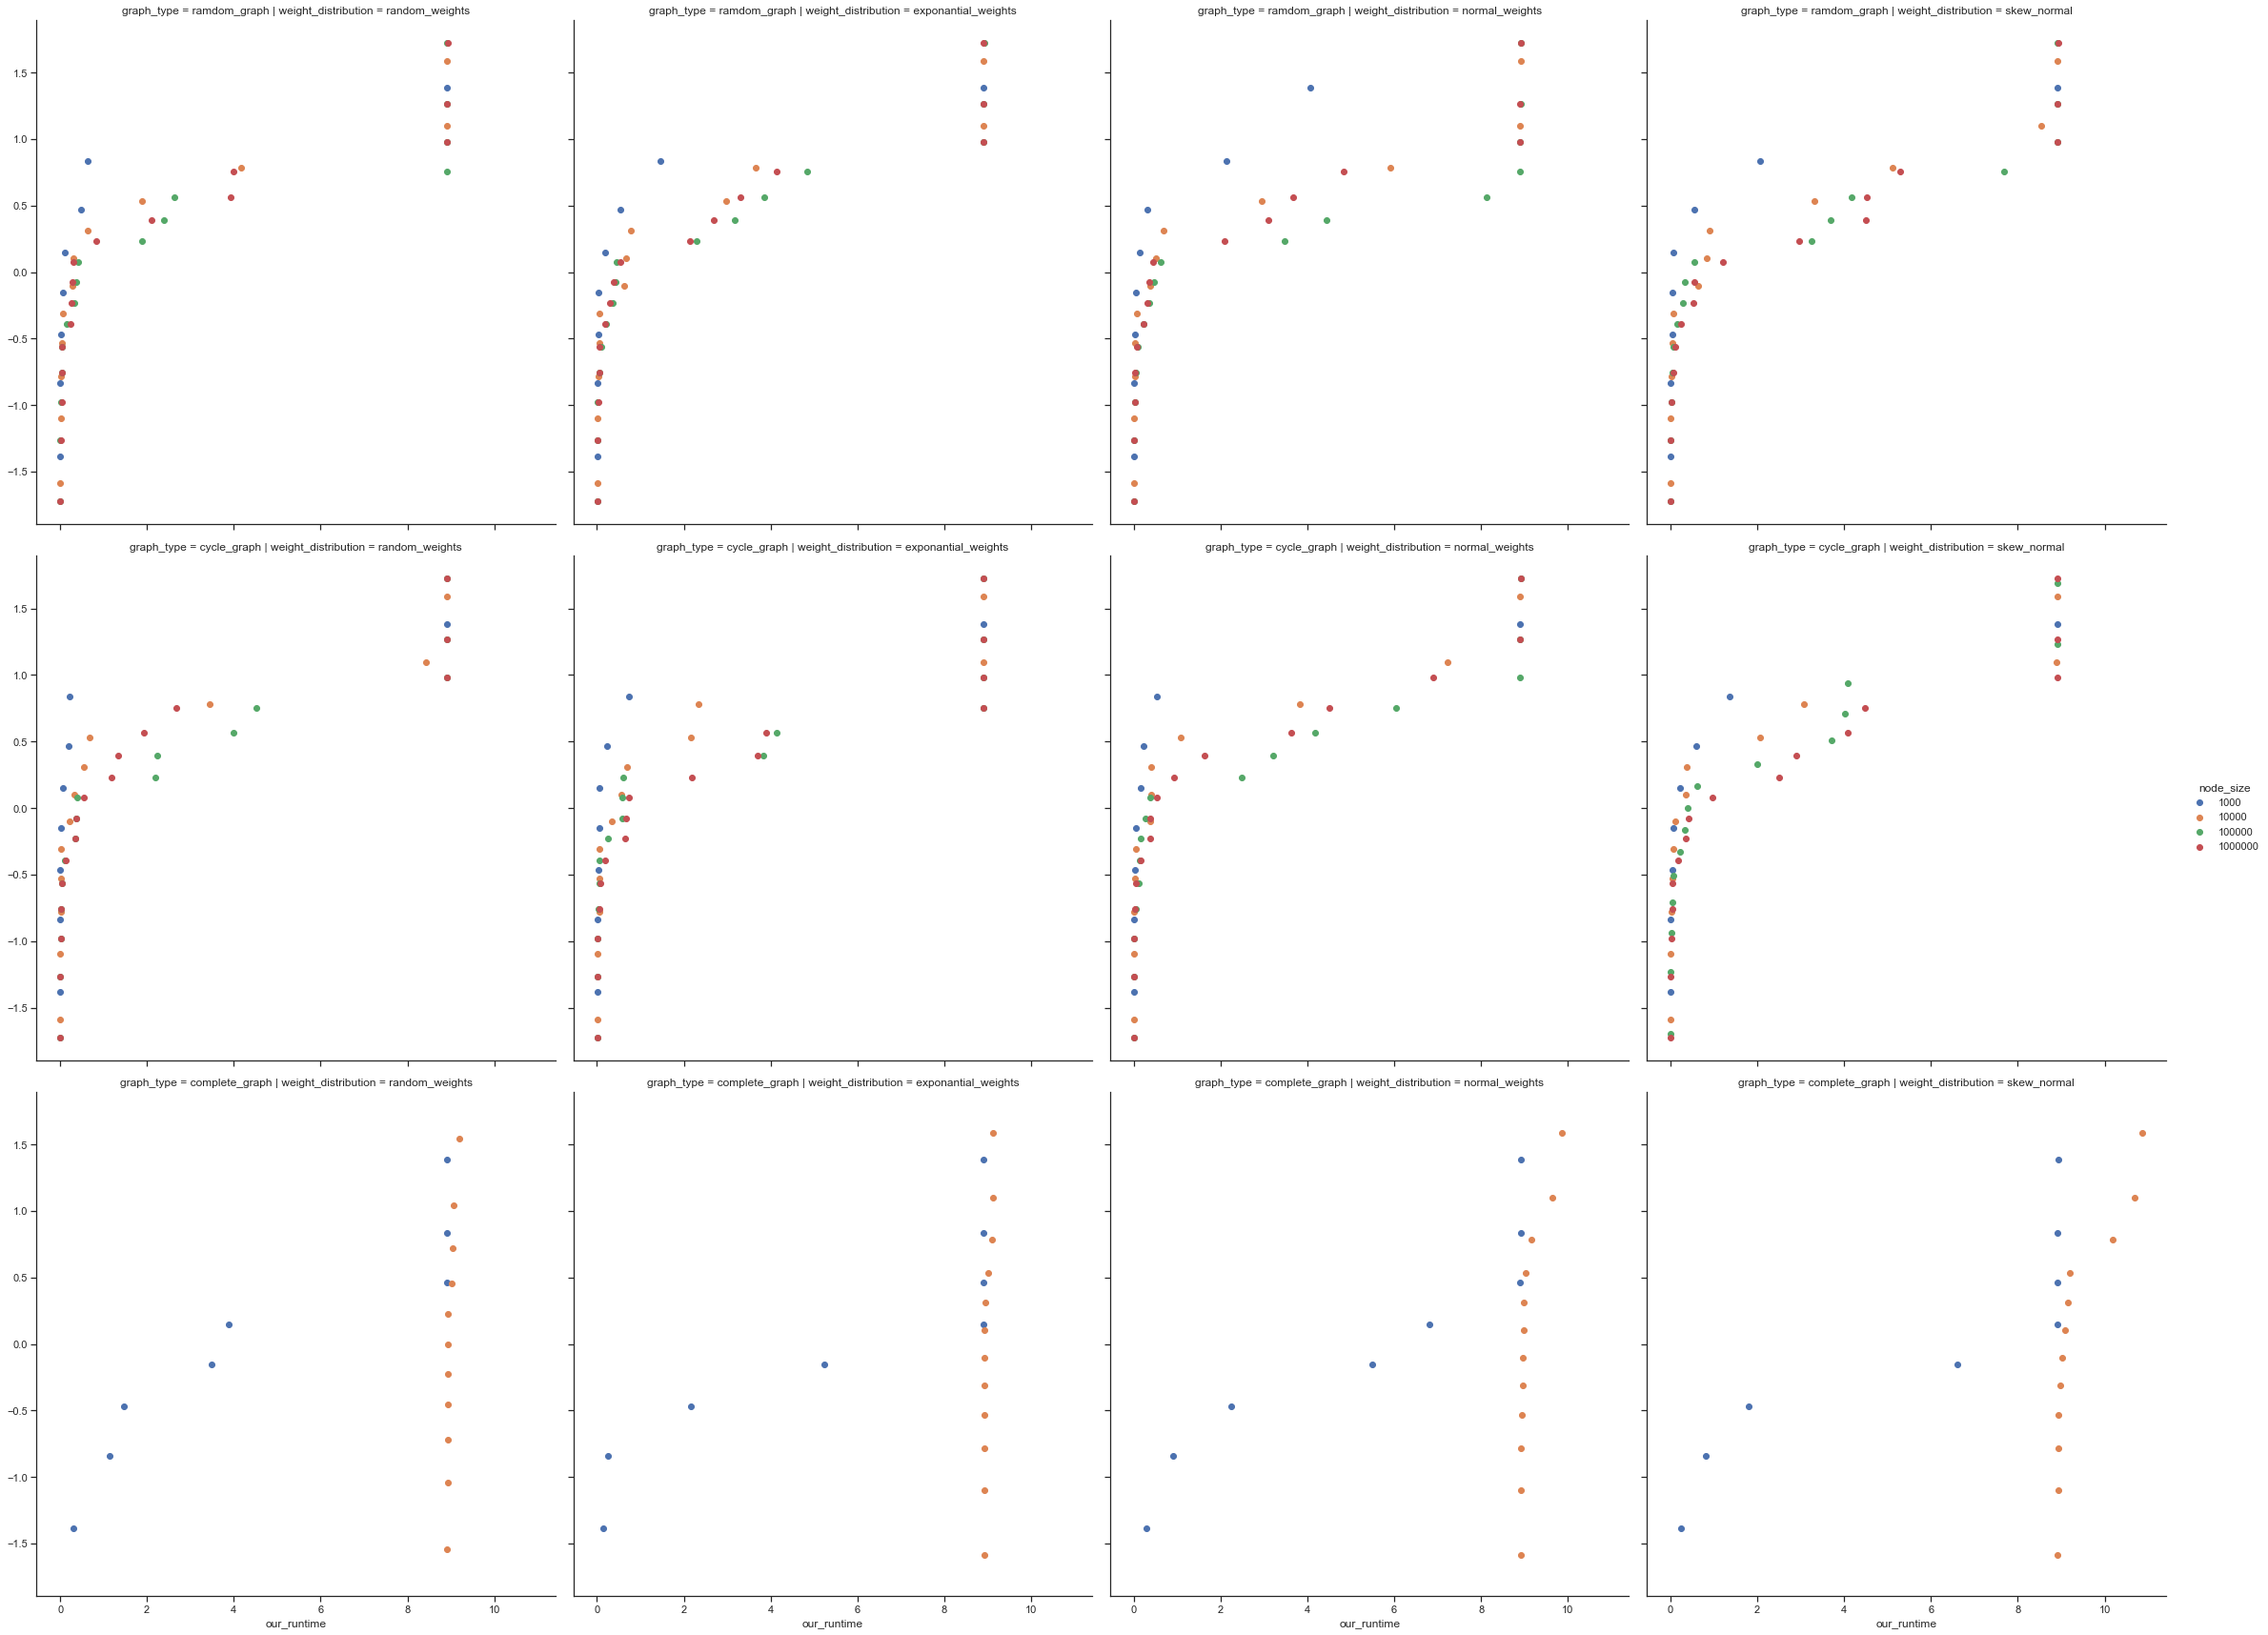

In [280]:
#Plot for weight distribution

#missing-max-read, max-weight

g = sns.FacetGrid(all_data, col="weight_distribution", row="graph_type", hue="node_size", height=8)

def quantile_plot(x, **kwargs):
    quantiles, xr = scp.stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

def qqplot(x, y, **kwargs):
    _, xr = scp.stats.probplot(x, fit=False)
    _, yr = scp.stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g.map(quantile_plot, "our_runtime")
g.add_legend()

#Analysis
- Time
- Weight distribtuion

Idea 
For every graph type 4x 2x2 plot, where every subplot is for the different weight distribution and ma weight conbo.
We then color code max read and plot approximation ans error across the four intervals of node size.

We then do the same for runtime/kuskrall runtime

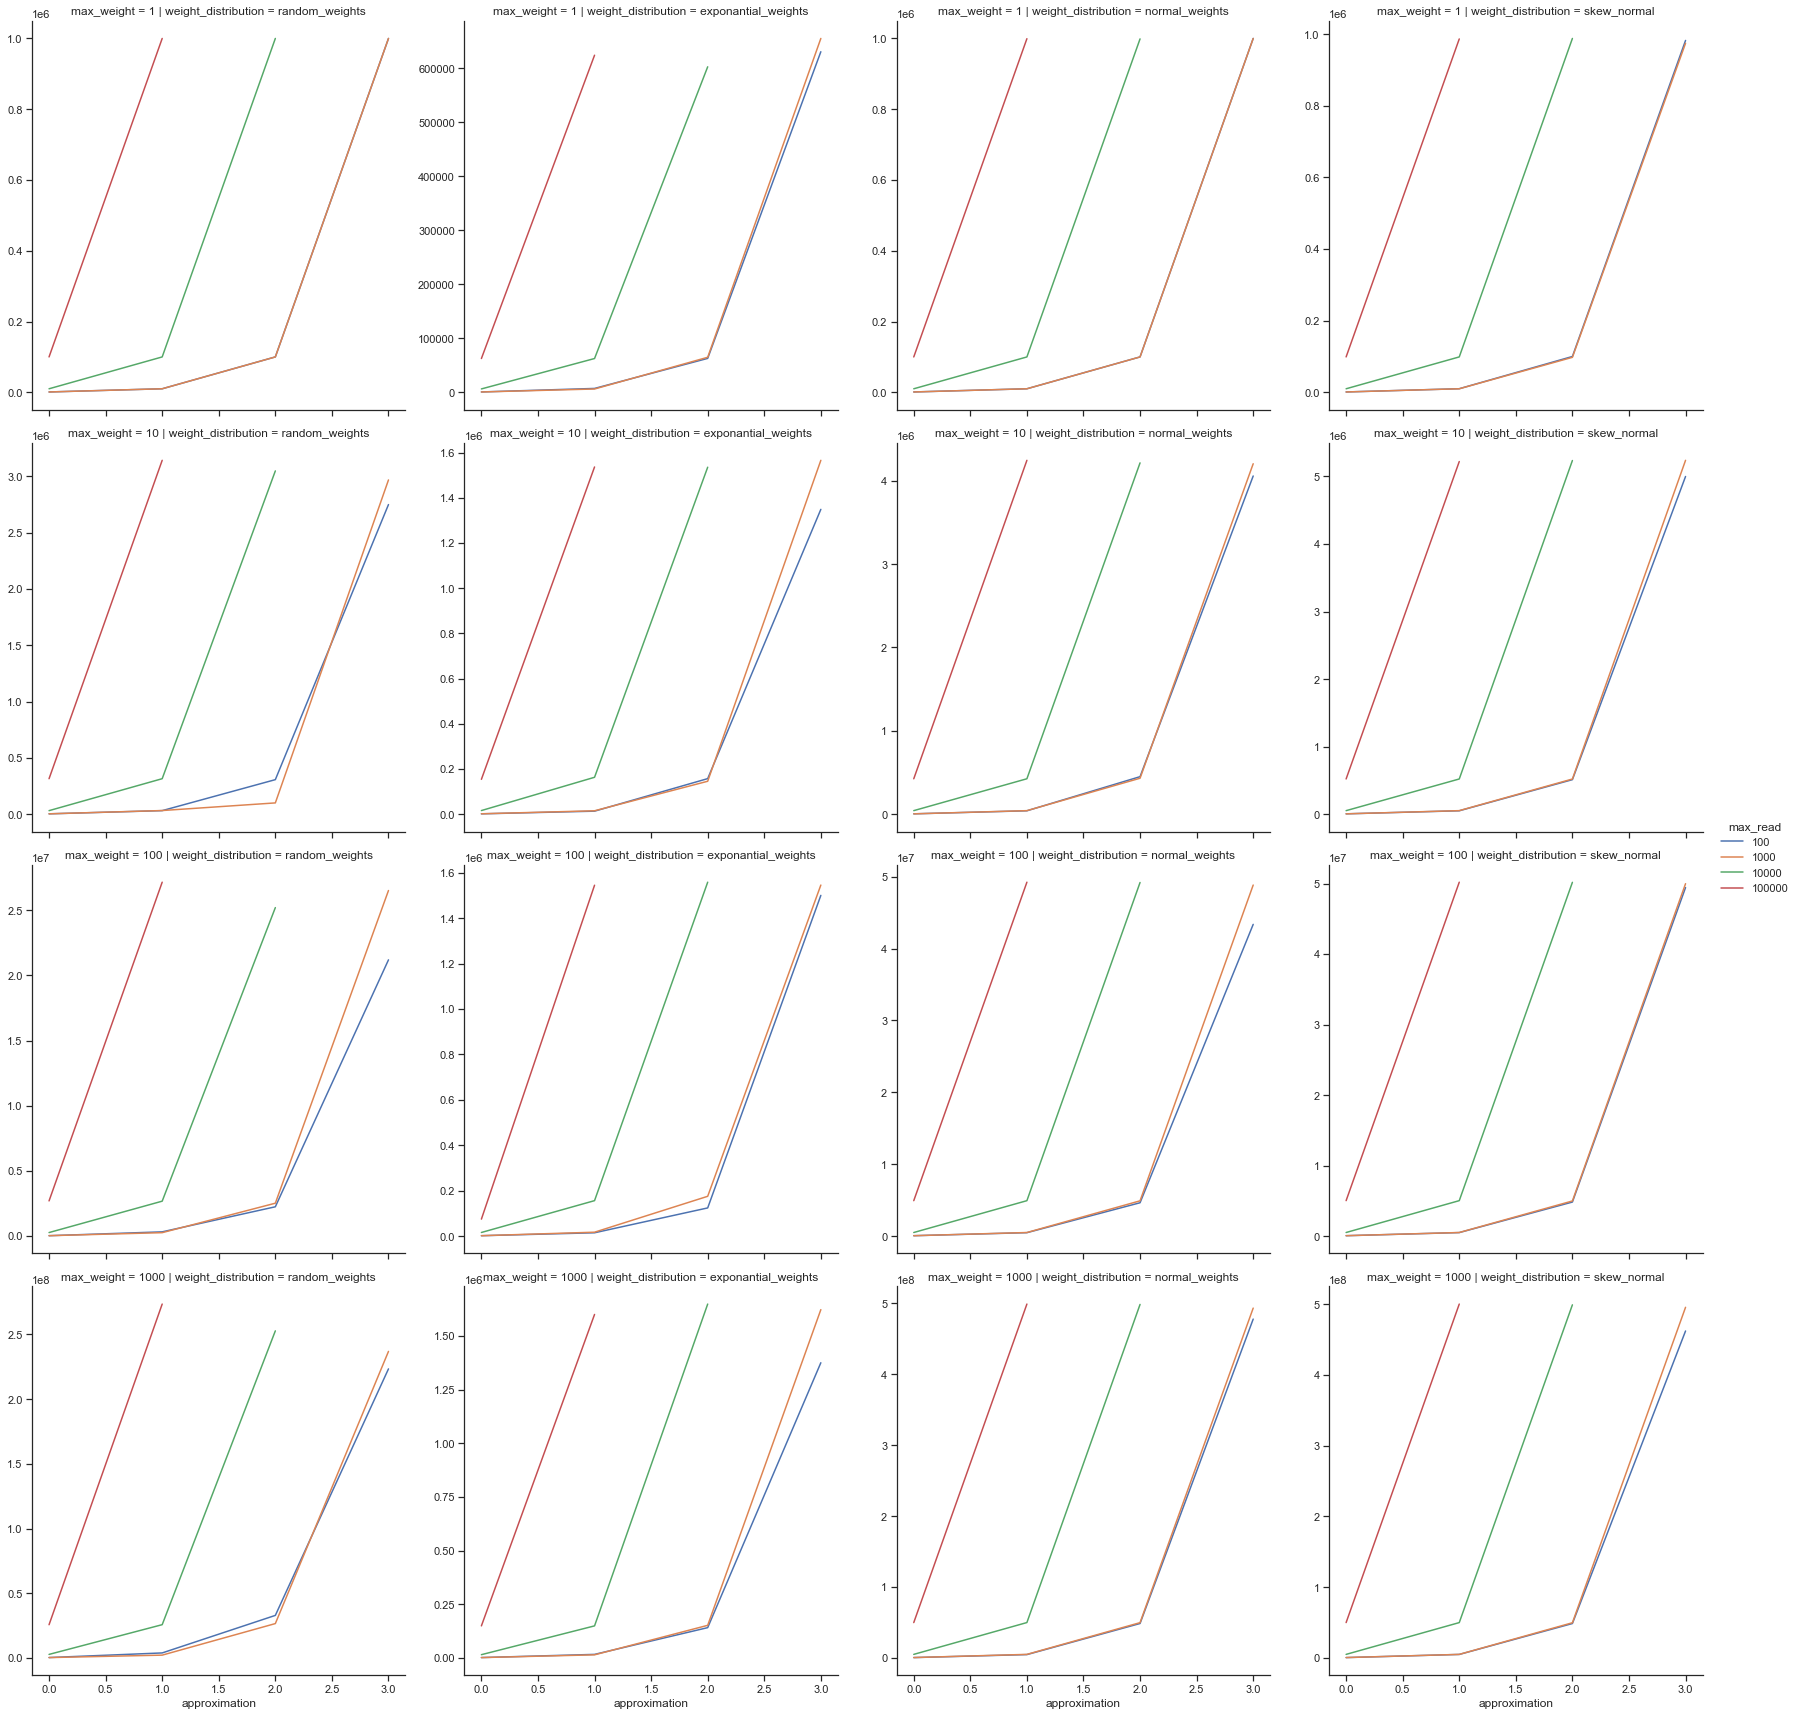

In [286]:
def plot_approximation(y, **kwargs):
    x = range(len(y))
    plt.plot(x,y, **kwargs)

data = random_graph_data
g = sns.FacetGrid(data, col="weight_distribution", row="max_weight", hue="max_read", height=6,sharey=False)
g.map(plot_approximation, "approximation")

g.add_legend()

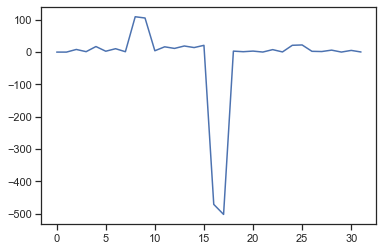

In [282]:
data = random_graph_data[(random_graph_data.node_size == 1000)]
x = range(len(data))
y = random_graph_data["approximation"]
plt.plot(x, "error",data=data)